In [1]:
#importing required packages

import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading dataset
dataset=load_dataset('lukebarousse/data_jobs')
#forming a dataframe
df = dataset['train'].to_pandas()


#data cleanup converting date column to date timetype from string type.
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)

df_DA_US= df[(df['job_title_short'] == 'Data Analyst') &( df['job_country']== 'United States')].copy()

/opt/anaconda3/envs/python_course/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [4]:
df_skills=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_skills

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [5]:
df_top_pay_skills = df_skills.sort_values(by='median', ascending = False).head(10)
df_top_pay_skills

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [6]:
df_top_count_skills = df_skills.sort_values(by='count', ascending = False).head(10).sort_values(by='median', ascending = False)
df_top_count_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


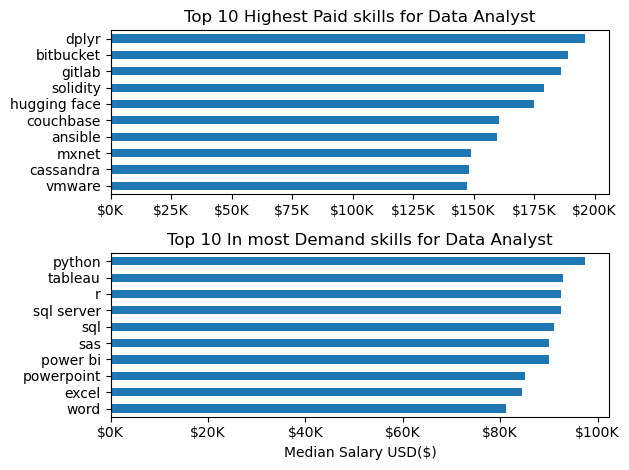

In [13]:
fig, ax = plt.subplots(2,1)
df_top_pay_skills[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K' ))

df_top_count_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 In most Demand skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary USD($)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K' ))

plt.tight_layout()